In [0]:
# https://drive.google.com/open?id=1fhIrSnt9ldTEOCPP3JZNbe4gwUYbRs7p
# https://drive.google.com/open?id=1ZFpo-LDsy1aj0f_OoCMXMq2Qj2GkHNef

### Install the packages using pip

We will use the following packages to achieve the tasks in this lesson:

- requests
- beautifoulsoup4

In [0]:
!pip install requests
!pip install beautifulsoup4
!pip install nltk
!pip install wordcloud

### Import modules

In [0]:
# Crawling related modules
import requests
from bs4 import BeautifulSoup

#Data handling modules
import numpy as np
import pandas as pd

### Fetch webpage contents using requests

Anthony will update this

In [0]:
# Make the request to a url
url = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=Quarry%20Bay%2C%20Hong%20Kong%2C%20HK"
r = requests.get(url)
c = r.content

In [0]:
 soup = BeautifulSoup(c)

## Data Handling

Here We will be using pandas for data exploration

For more detailed introduction, please look at
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

First we have a look at the example

In [0]:
sample_reviews = [ """Walking around the city and my dad said this was the place to go for pineapple buns $0.75 USD!!!
The buns are HUGE! We didn't try it with butter but I'm sure it would be even better.
We also ordered their milk tea. What a great combo, especially on a hot and humid July day!
You can't miss this place. There are plenty of people who walk by and stop by this stall--its right outside of a restaurant.""", 
"""Best pineapple buns ever. $10HKD and they're fresh, warm and have a slab of cold butter in them. I'd been getting them everywhere throughout HK but they're the largest, best texture, and best flavor here.
Note: they have a minimum charge per person to sit. It's listed in Chinese on the table but since none of us could read it, we didn't know.
Cash only.
""" ]

#### Common Text Processing Approach

- Tokenization: Convert sentence to words
- Drops punctuation, numbers, tags
- Removing Stop words (Words do not have specific meanings) such as "the", "is". 
- (Advanced) Stemming and lemmatization
The goal is to reduce inflectional forms or to reduce a word to a common base form.

> - am, are, is $\Rightarrow$ be
> - car, cars, car's, cars' $\Rightarrow$ car
> - the boy's cars are different colors $\Rightarrow$
the boy car be differ color



In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
#From sentence to words
sample_token = word_tokenize(sample_reviews[0])
#nltk.FreqDist(sample_token)  # Many unwanted strings

# Drops punctuation, numbers, tags 
sample_token1 = [word for word in sample_token if word.isalpha()] 
#nltk.FreqDist(sample_token1)  # Better but stop words

# Removing Stop Words
sample_token2 = [word.lower() for word in sample_token1 if word not in stopwords.words('english')]
#nltk.FreqDist(sample_token2)

# How about noun and adj only?
tags = nltk.pos_tag(sample_token2)
"""
1.     CC      Coordinating conjunction
2.     CD     Cardinal number
3.     DT     Determiner
4.     EX     Existential there
5.     FW     Foreign word
6.     IN     Preposition or subordinating conjunction
7.     JJ     Adjective
8.     JJR     Adjective, comparative
9.     JJS     Adjective, superlative
10.     LS     List item marker
11.     MD     Modal
12.     NN     Noun, singular or mass
13.     NNS     Noun, plural
14.     NNP     Proper noun, singular
15.     NNPS     Proper noun, plural
16.     PDT     Predeterminer
17.     POS     Possessive ending
18.     PRP     Personal pronoun
19.     PRP$     Possessive pronoun
20.     RB     Adverb
21.     RBR     Adverb, comparative
22.     RBS     Adverb, superlative
23.     RP     Particle
24.     SYM     Symbol
25.     TO     to
26.     UH     Interjection
27.     VB     Verb, base form
28.     VBD     Verb, past tense
29.     VBG     Verb, gerund or present participle
30.     VBN     Verb, past participle
31.     VBP     Verb, non-3rd person singular present
32.     VBZ     Verb, 3rd person singular present
33.     WDT     Wh-determiner
34.     WP     Wh-pronoun
35.     WP$     Possessive wh-pronoun
36.     WRB     Wh-adverb
"""
accept_list = ["NN", "NNP", "NNS", "NNPS", "JJ", "JJR", "JJS"]
sample_token3 = [word for word,pos in tags if pos in accept_list]

#Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
filtered_words = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in sample_token3]

#nltk.FreqDist(sample_token2)
fd = nltk.FreqDist(filtered_words)

In [0]:
fd.most_common(12)

[('place', 2),
 ('bun', 2),
 ('city', 1),
 ('dad', 1),
 ('pineapple', 1),
 ('huge', 1),
 ('butter', 1),
 ('i', 1),
 ('sure', 1),
 ('milk', 1),
 ('tea', 1),
 ('great', 1)]

In [0]:
' '.join(filtered_words)

'city dad place pineapple bun bun huge butter i sure milk tea great combo hot humid july day place plenty people stall right outside restaurant'

### Lemmatization showcase

In [0]:
## Effect
wordnet_lemmatizer = WordNetLemmatizer()
for word in sample_token2[:5]:
  print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#(Extremely positive, positive, neutral, negative, Extremely negative) --> betwen (-1,1)
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
sid.polarity_scores("This is good restaurant with some bad dishes")

{'compound': -0.1531, 'neg': 0.282, 'neu': 0.484, 'pos': 0.234}

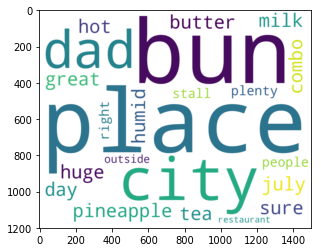

In [0]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words=1000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=500, height=400,
random_state=1).generate(' '.join(filtered_words))
plt.imshow(wc, interpolation='bilinear')

# Exercise

## 1. Read CSV 
#### https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [0]:
import pandas as pd

## 2. Find aggregated score and counts

## 3. Seaborn for ploting
#### https://seaborn.pydata.org/examples/faceted_histogram.html

In [0]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

## Sentiment

## Data Preprocessing

## Word Cloud